In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("patient_risk_data_300k.csv")


In [3]:
df.shape


(300000, 14)

In [4]:
df.head()

,PatientID,Age,Gender,Smoking,AlcoholConsumption,PhysicalActivity,BMI,ChronicDiseases,Medications,FamilyHistory,RiskLevel,LastCheckupDate,RiskScore,Alerts
0,P000001,32,Male,No,Low,Low,21.1,NaN,0,Cancer,Medium,2024-07-03,0.74,🟡
1,P000002,29,Female,Yes,NaN,NaN,22.8,HeartDisease,1,Stroke,Low,2024-05-11,0.20,🟢
2,P000003,87,Female,Yes,High,Moderate,35.8,NaN,0,Arthritis,High,2024-04-16,0.81,🔴
3,P000004,72,Female,No,Low,Low,39.1,Diabetes,1,NaN,Low,2024-10-07,0.38,🟢
4,P000005,62,Female,Yes,High,NaN,39.4,Obesity,1,Stroke,Low,2024-05-22,0.29,🟢


In [5]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Smoking,0
AlcoholConsumption,75802
PhysicalActivity,75082
BMI,0
ChronicDiseases,49684
Medications,0
FamilyHistory,43087


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PatientID           300000 non-null  object 
 1   Age                 300000 non-null  int64  
 2   Gender              300000 non-null  object 
 3   Smoking             300000 non-null  object 
 4   AlcoholConsumption  224198 non-null  object 
 5   PhysicalActivity    224918 non-null  object 
 6   BMI                 300000 non-null  float64
 7   ChronicDiseases     250316 non-null  object 
 8   Medications         300000 non-null  int64  
 9   FamilyHistory       256913 non-null  object 
 10  RiskLevel           300000 non-null  object 
 11  LastCheckupDate     300000 non-null  object 
 12  RiskScore           300000 non-null  float64
 13  Alerts              300000 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 32.0+ MB


In [7]:
df.describe()

,Age,BMI,Medications,RiskScore
count,300000.000000,300000.000000,300000.000000,300000.000000
mean,53.998617,28.987592,2.083203,0.499486
std,21.089596,6.347692,1.380280,0.289011
min,18.000000,18.000000,0.000000,0.000000
25%,36.000000,23.500000,1.000000,0.250000
50%,54.000000,29.000000,2.000000,0.500000
75%,72.000000,34.500000,3.000000,0.750000
max,90.000000,40.000000,4.000000,1.000000


In [8]:
df_clean = df.drop(['PatientID', 'LastCheckupDate', 'Alerts'], axis=1)

In [9]:
categorical_cols = ['Gender', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
                    'ChronicDiseases', 'FamilyHistory']

In [10]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

In [11]:
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_clean['RiskLevel'] = df_clean['RiskLevel'].map(risk_mapping)


X = df_clean.drop('RiskLevel', axis=1)
y = df_clean['RiskLevel']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:

y_pred = rf_model.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23808
           1       1.00      1.00      1.00     23916
           2       1.00      1.00      1.00     12276

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000


Confusion Matrix:
 [[23808     0     0]
 [    0 23916     0]
 [    0     0 12276]]


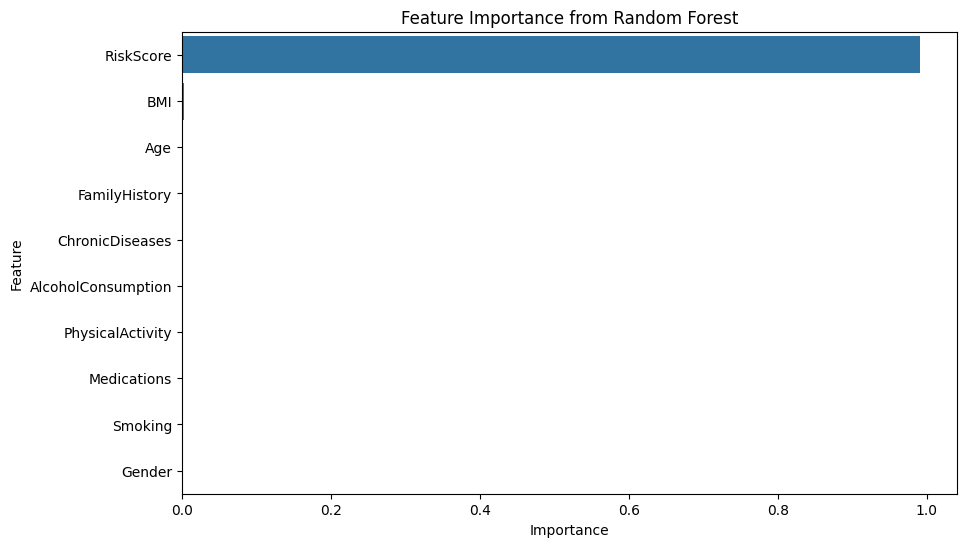

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance from Random Forest')
plt.show()

In [17]:
import joblib

# Save the model
joblib.dump(rf_model, 'patient_risk_rf_model.pkl')

print("Model saved as patient_risk_rf_model.pkl")


Model saved as patient_risk_rf_model.pkl


In [ ]:
# Load the model
loaded_model = joblib.load('patient_risk_rf_model.pkl')

# Use it to predict
y_loaded_pred = loaded_model.predict(X_test)

# Check if it works
print("Loaded Model Accuracy:", accuracy_score(y_test, y_loaded_pred))
